In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append('../../')

mm = 1/25.4
plt.rcParams['font.family']= "Times New Roman"
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
plt.rcParams['mathtext.fontset']='cm'
plt.style.use('tableau-colorblind10')

Text(0, 0.5, 'colorbar')

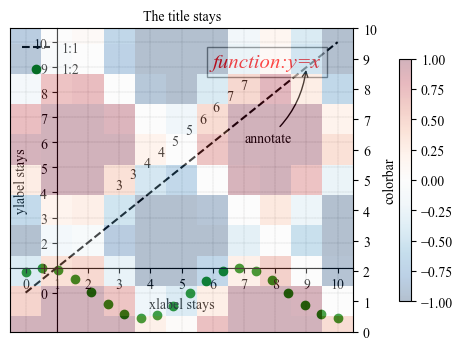

In [69]:
# Intro to matplotlib
fig,ax = plt.subplots(figsize=(150*mm,100*mm))

ax.set_title('The title stays',fontsize=10)
ax.set_xlabel('xlabel stays',fontsize=10)
ax.set_ylabel('ylabel stays',fontsize=10)
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xticks(np.linspace(0,10,11))
ax.set_yticks(np.linspace(0,10,11))

ax.plot(np.linspace(0,10,100),np.linspace(0,10,100),label='1:1',color='k',linestyle='--')
ax.scatter(np.linspace(0,10,20),np.sin(np.linspace(0,10,20)+1),label='1:2',color='g',marker='o')
ax.legend(loc='upper left',fontsize=10,frameon=False)
ax.grid('major',color='k',linestyle='--',linewidth=0.1)
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
ax.spines['bottom'].set_position(('data',1)) #将x轴移到y=0处
ax.spines['left'].set_position(('data',1)) #将x轴移到x=0处
ax.text(6,9,"function:y=x",size=15,color='r',style='italic',weight='light',bbox=dict(facecolor='w',alpha=0.5))
for coord in np.linspace(3,7,10):
    ax.text(coord,coord+1,'%.0f'%coord,ha='center',va='bottom')

ax.annotate('annotate',xy=(9,9),xytext=(7,6),arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=0.2'))

ax2 = ax.twinx()
ax2.set_ylabel('ylabel stays',fontsize=10)
ax2.set_yscale('linear')
ax2.set_yticks(np.linspace(0,10,11))
ax2.set_ylim(0,10)
X,Y = np.meshgrid(np.linspace(0,10,11),np.linspace(0,10,11))
Z = np.sin(X)+np.cos(Y)
pc = ax2.pcolormesh(X,Y,Z,cmap='RdBu_r',vmin=-1, vmax=1,alpha=0.3)
fig.colorbar(pc,ax=ax2,shrink=0.8,pad=0.1)
ax2.set_ylabel('colorbar',fontsize=10)

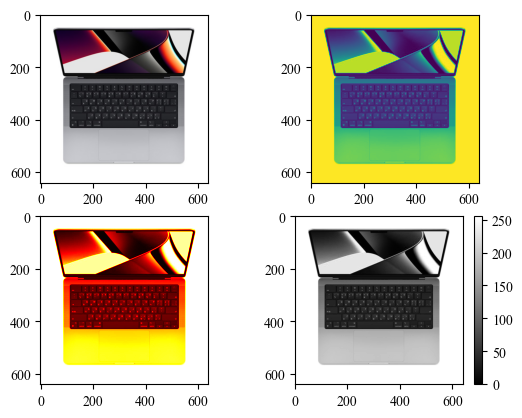

In [75]:
# Image tutorial
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

plt.subplot(2,2,1)
img = np.asarray(Image.open('../input/MacbookPro14.jpeg'))
imgplot = plt.imshow(img)

plt.subplot(2,2,2)
lug_img = img[:,:,0]
imgplot = plt.imshow(lug_img)

plt.subplot(2,2,3)
plt.imshow(lug_img,cmap='hot')

plt.subplot(2,2,4)
plt.imshow(lug_img,cmap='gray')
plt.colorbar()


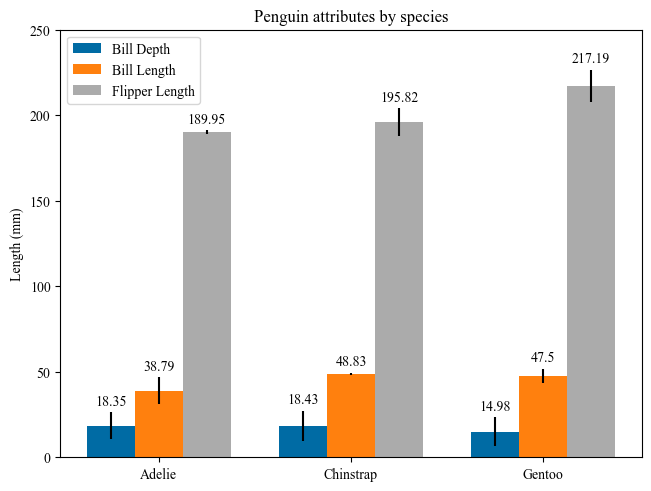

In [82]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    error = np.random.rand(len(x))*10
    rects = ax.bar(x + offset, measurement, width, label=attribute,yerr=error)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left')
ax.set_ylim(0, 250)

plt.show()

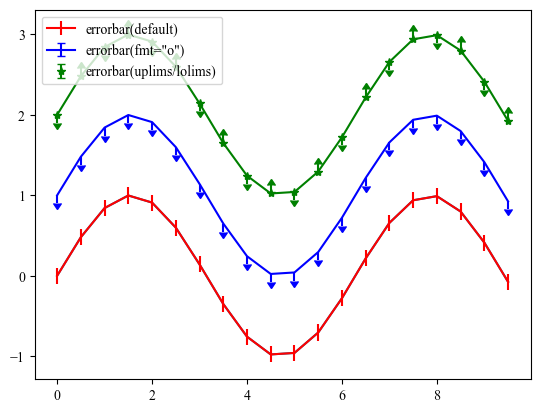

In [95]:
x = np.arange(0, 10, 0.5)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.errorbar(x, y, yerr=0.1,color='r',label='errorbar(default)')
ax.plot(x, y+2, color='g', markersize=12)

ax.errorbar(x,y+1,yerr=0.1,color='b',uplims=True,label='errorbar(fmt="o")')
upperlimits = [True, False] * 10
lowerlimits = [False, True] * 10
ax.errorbar(x, y+2, yerr=0.1,uplims=upperlimits,lolims=lowerlimits, fmt='*',color='g',label='errorbar(uplims/lolims)')
ax.legend(loc='upper left')

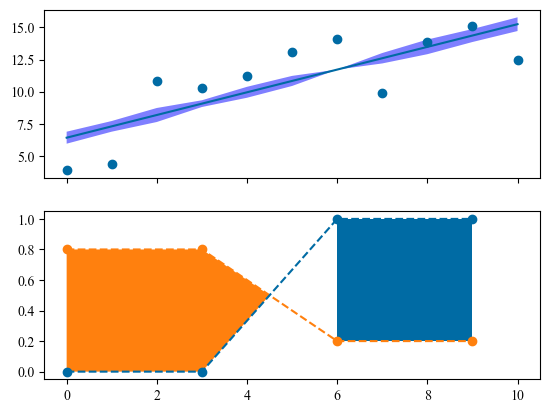

In [117]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
N = 11
x = np.arange(N)
y1 = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]
a,b = np.polyfit(x,y1,1)
y2 = a*x+b
y1err = np.random.rand(N) 
ax1.plot(x, y2,'-')
ax1.fill_between(x, y2-y1err, y2+y1err, facecolor='blue', alpha=0.5)
ax1.plot(x, y1,'o',color='C0')

x = np.array([0, 1, 2, 3])*3
y1 = np.array([0.8, 0.8, 0.2, 0.2])
y2 = np.array([0, 0, 1, 1])
ax2.plot(x, y1, 'o--', color='C1')
ax2.plot(x, y2, 'o--', color='C0')
ax2.fill_between(x, y1, y2, where=y2 > y1, facecolor='C0')
ax2.fill_between(x, y1, y2, where=y2 < y1, facecolor='C1', interpolate=True)

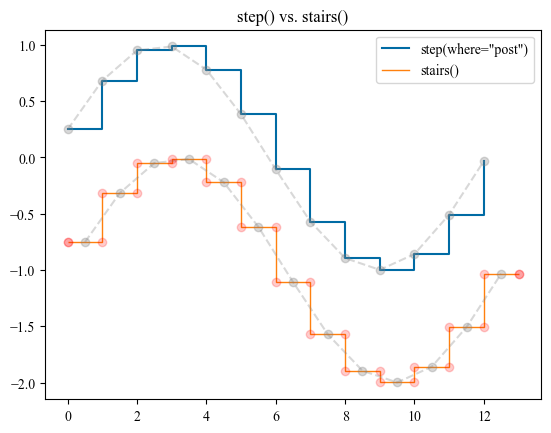

In [118]:
bins = np.arange(14)
centers = bins[:-1] + np.diff(bins) / 2
y = np.sin(centers / 2)

plt.step(bins[:-1], y, where='post', label='step(where="post")')
plt.plot(bins[:-1], y, 'o--', color='grey', alpha=0.3)

plt.stairs(y - 1, bins, baseline=None, label='stairs()')
plt.plot(centers, y - 1, 'o--', color='grey', alpha=0.3)
plt.plot(np.repeat(bins, 2), np.hstack([y[0], np.repeat(y, 2), y[-1]]) - 1,
         'o', color='red', alpha=0.2)

plt.legend()
plt.title('step() vs. stairs()')
plt.show()

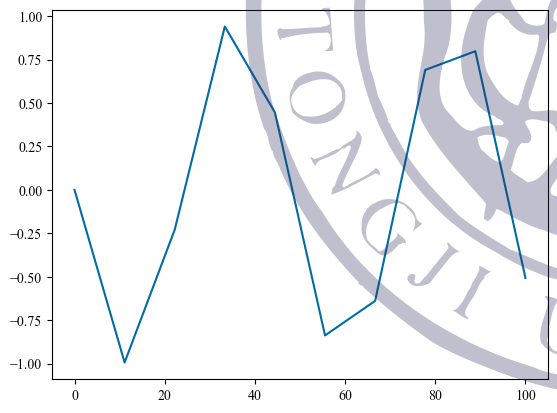

In [125]:
fig,ax = plt.subplots()
x = np.linspace(0,100,10)
y = np.sin(x)
ax.plot(x,y,color='C0')

import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.pyplot as plt
with cbook.get_sample_data('/home/step/data/python-smelly-cat/input/tongjilogopng.png') as file:
    im = image.imread(file)
fig.figimage(im,1,1,zorder=0.3,alpha=0.3)

<a list of 6 text.Text objects>

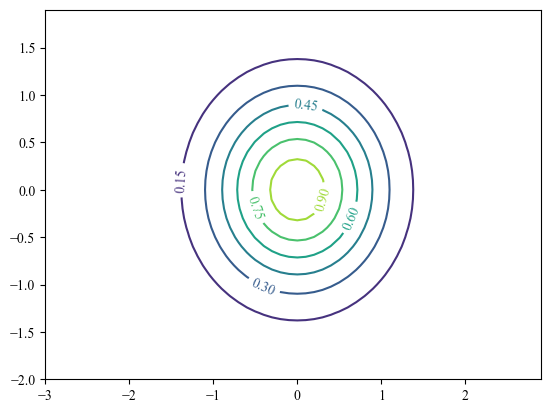

In [127]:
delta = 0.1
x = np.arange(-3,3,delta)
y = np.arange(-2,2,delta)
X,Y = np.meshgrid(x,y)
Z1 = np.exp(-X**2-Y**2)
fig,ax = plt.subplots()
CS = ax.contour(X,Y,Z1)
ax.clabel(CS,inline=True)

In [ ]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

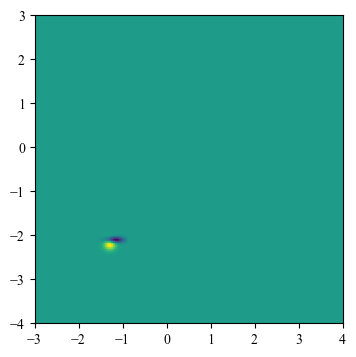

In [140]:
from matplotlib import cbook
import matplotlib.pyplot as plt
import numpy as np


def get_demo_image():
    z = cbook.get_sample_data("axes_grid/bivariate_normal.npy", np_load=True)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)

fig, ax = plt.subplots(figsize=[5, 4])

# make data
Z, extent = get_demo_image()
Z2 = np.zeros((150, 150))
ny, nx = Z.shape
Z2[30:30+ny, 30:30+nx] = Z

ax.imshow(Z2, extent=extent, origin="lower")


# inset axes....
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.imshow(Z2, extent=extent, origin="lower")
# subregion of the original image
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
